In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
L = 10 # comprimento da barra
Δx = .1
num_pontos = int(np.ceil(L/Δx))
Δt = 0.001
tempo_final = 100
k = 0.835
λ = k * Δt/Δx**2
condição_inicial = 0.
contorno = np.array([100.,50.])
xx = np.arange(0,L,Δx)
tt = np.arange(0,tempo_final,Δt)

In [20]:
λ

0.08349999999999999

In [21]:
#condição inicial u(x,0) = f(x)

u = np.zeros((len(tt),len(xx)))

for x in range(len(xx)):
    u[0,x] = condição_inicial
u


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
# condição de contorno u(0,t) = a(t) e u(L,t) = b(t)
a = lambda t: 100
b = lambda t: 50

# Calcular a edp
for t in range(len(tt)-1) :
    for x in range(len(xx)):
        if x == 0:
            termo_anterior = a(t)
            termo_posterior = u[t,x+1]
        elif x + 1 == len(xx):
            termo_anterior = u[t,x-1]
            termo_posterior = b(t)
        else:
            termo_anterior = u[t,x-1]
            termo_posterior = u[t,x+1]
        
        u[t+1,x] = λ*(termo_posterior + termo_anterior) + u[t,x]*(1-2*λ)
u

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 8.35      ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  4.175     ],
       [15.30555   ,  0.697225  ,  0.        , ...,  0.        ,
         0.3486125 ,  7.652775  ],
       ...,
       [99.50402922, 99.00805933, 98.51209122, ..., 51.48238825,
        50.98825735, 50.49412823],
       [99.50402929, 99.00805948, 98.51209144, ..., 51.48238847,
        50.9882575 , 50.4941283 ],
       [99.50402937, 99.00805962, 98.51209166, ..., 51.48238869,
        50.98825764, 50.49412838]])

Text(0.5, 1.0, 'Solução numérica no ponto 8.0')

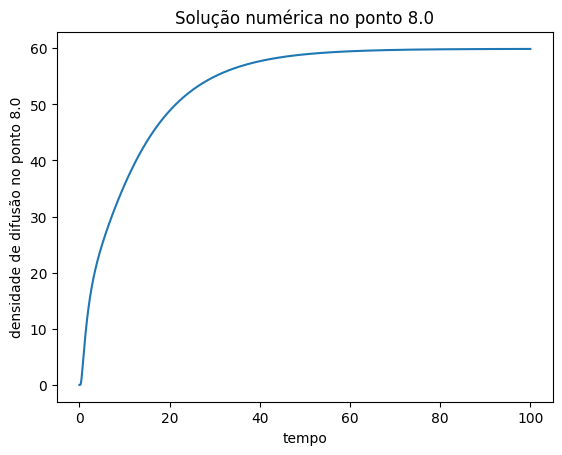

In [65]:
a = 80
plt.plot(tt,u[:,a])
plt.xlabel('tempo')
plt.ylabel(f'densidade de difusão no ponto {xx[a]}')
plt.title(f'Solução numérica no ponto {xx[a]}')

In [66]:
def f(x,t):
    global k
    somatorio = 0
    for n in range(1,1000):
        # print(somatorio)
        somatorio += 100*((-1)**n - 2)/(n * np.pi) * np.sin(n*np.pi*x/10)*np.exp(-k*(n* np.pi/10)**2*t)
    return 100 - 5*x + somatorio

Text(0.5, 1.0, 'Solução analitica u(8.0,t)')

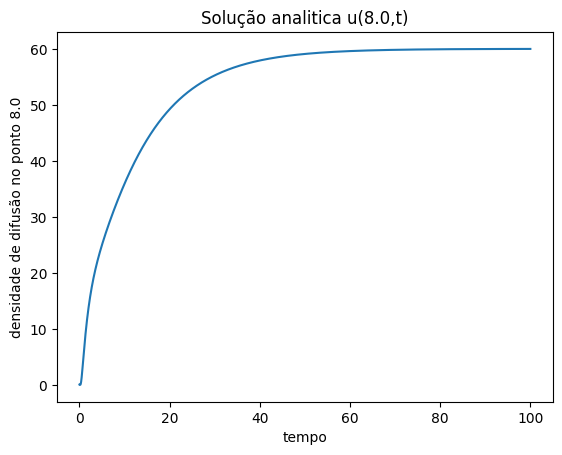

In [67]:
plt.plot(tt,f(xx[a],tt))
plt.xlabel('tempo')
plt.ylabel(f'densidade de difusão no ponto {xx[a]}')
plt.title(f'Solução analitica u({xx[a]},t)')

Text(0, 0.5, 'densidade de difusão no ponto 8.0')

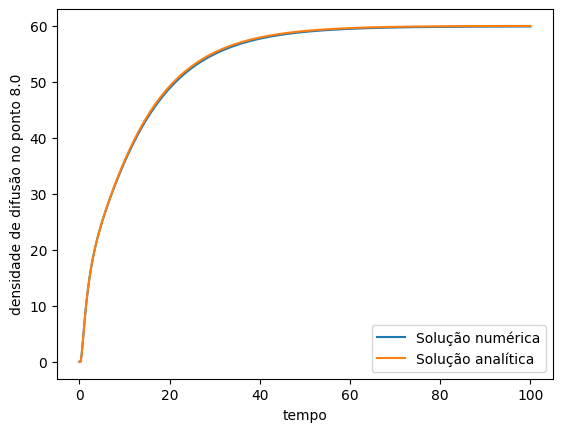

In [68]:
plt.plot(tt,u[:,a],label='Solução numérica')
plt.plot(tt,f(xx[a],tt),label='Solução analítica')
plt.legend()
plt.xlabel('tempo')
plt.ylabel(f'densidade de difusão no ponto {xx[a]}')

In [69]:
erro_percentual = (f(xx[a],tt) - u[:,a].flatten())/f(xx[a],tt)

C:\Users\micka\AppData\Local\Temp\ipykernel_17788\189587918.py:1: RuntimeWarning: invalid value encountered in divide
  erro_percentual = (f(xx[a],tt) - u[:,a].flatten())/f(xx[a],tt)


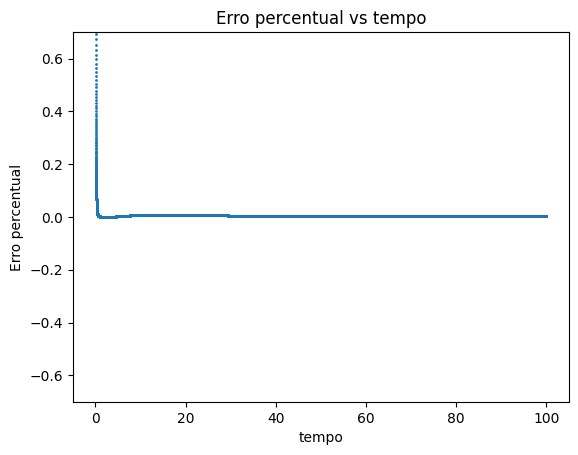

In [74]:
escala = .7
plt.scatter(tt,np.abs(erro_percentual),s=1)
plt.title("Erro percentual vs tempo")
plt.ylabel("Erro percentual")
plt.ylim(-escala,escala)
plt.xlabel("tempo")
plt.show()

In [71]:
# incremento = u.shape[0]/5000 # número de imagem que vai ser gerado
# numero_imagem = 1

# for i in range(0,u.shape[0],int(np.floor(incremento))):

#     plt.plot(xx,u[i,:])
#     plt.xlabel('Comprimento da barra (m)')
#     plt.ylabel("densidade de calor")
#     plt.ylim(0,np.max(u))
#     plt.xlim(0,L)
#     plt.savefig(f'imagens/imagem{numero_imagem}.png')
#     numero_imagem += 1
#     plt.cla()

tentar fazer a animação usando o pillow

In [72]:
# # Caminho para a pasta com as imagens
# folder_path = 'imagens/'

# # Obter a lista de nomes de arquivos de imagem
# image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.png')]

# # Função para extrair o número do nome do arquivo
# def extract_number(filename):
#     # Remover o prefixo e a extensão do nome do arquivo
#     basename = os.path.basename(filename)
#     number = basename.replace('imagem', '').replace('.png', '')
#     # Converter para inteiro e retornar
#     return int(number)

# # Ordenar a lista de nomes de arquivos em ordem numérica
# image_files.sort(key=extract_number)

# # Criar a lista de objetos Image
# images = [Image.open(image) for image in image_files]

# # Salvar como GIF animado
# images[0].save('animation.gif', save_all=True, append_images=images[1:], duration=100, loop=0)

# for file in image_files:
#     os.remove(file)